In [121]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot, legend, title, xlabel, ylabel, show, imshow, hot, close
import scipy.special as sp

In [2]:
def j(m,x,theta):
    return np.cos(m*theta-x*np.sin(theta))
def J(m,x):
    a=0
    b=pi
    N=1000
    h= (b-a)/N
    suma=0
    suma1=0
    for k in range(1,N,2):
        suma= suma + 4*j(m,x,a + k*h)
    for k in range(2,N,2):
        suma1= suma1 + 2*j(m,x,a + k*h)
    return (1/pi)*(h/3)*( j(m,x,a) + j(m,x,b) + suma + suma1)

Text(0, 0.5, '$y$')

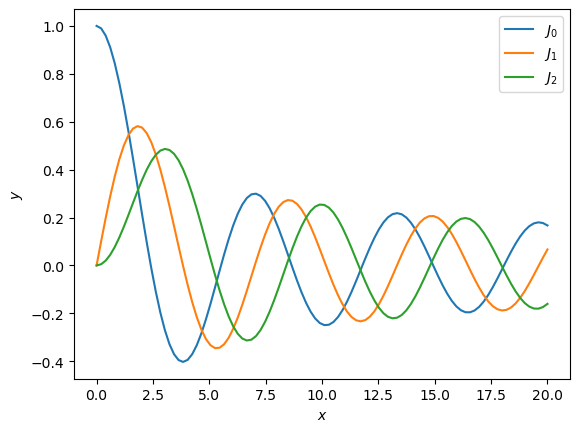

In [3]:
X = np.linspace(0, 20, 100)
Y=[]

for m in range(3):
    y0=[]
    for x in X:
        y0.append(J(m,x))
    Y.append(y0)

Y= np.array(Y)

for i in range(3):
    plt.plot(X,Y[i])
legend(("$J_0$", "$J_1$", "$J_2$"))
plt.xlabel("$x$")
plt.ylabel("$y$")

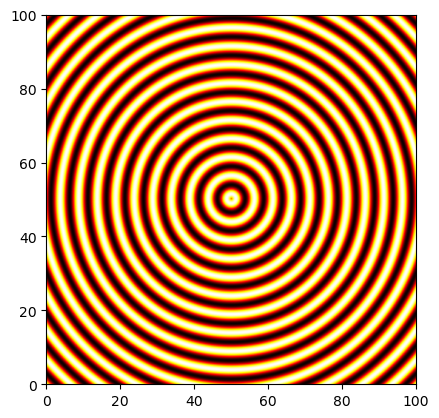

In [53]:
wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separacion de los centros en cm
side = 100.0           # lado del cuadro en cm
points = 500           # Número de puntos de la cuadrícula a lo largo de cada lado
spacing = side/points  # Espaciado de puntos en cm


# Calculo de las posiciones de los centros de los círculos.
x1 = side/2 
y1 = side/2

# Crea un arreglo para almacenar las alturas.
xi = np.empty([points,points],float)

# Calcula los valores en el arreglo.
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        xi[i,j] = xi0*sin(k*r1) 

# Hace la gráfica
imshow(xi,origin="lower",extent=[0,side,0,side])
hot()

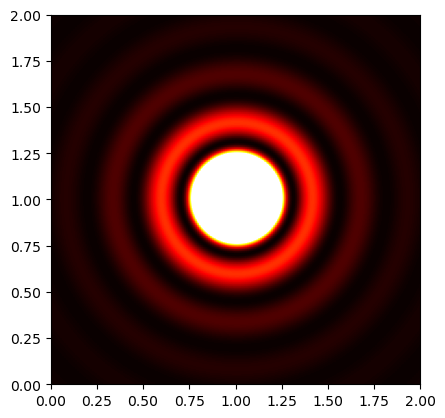

In [113]:
def r(x, y):
    return sqrt(x**2 + y**2)

def I(r):
    if r == 0:
        return 1/4
    Kr = 2 * pi / (0.5)* r
    return (J(1, Kr)/ Kr)**2

lado = 2
puntos = 200
espacio = lado / puntos

x1 = lado / 2
y1 = lado / 2

X = np.empty([puntos, puntos], float)

for u in range(puntos):
    y = espacio * u
    for v in range(puntos):
        x = espacio * v
        r1 = r(x - x1, y - y1)
        X[u, v] = I(r1)

imshow(intensities, origin="lower", extent=[0, lado, 0, lado], vmax=0.01)
hot()

In [100]:
def f(x):
    return x**4 -2*x +1

def integral(a,b,N):
    h=(b-a)/N
    suma=0
    for i in range(1,N):
        suma= suma+ f(a+i*h)
    return h*(0.5*f(a)+0.5*f(b)+suma)

In [116]:
E = (integral(0,2,20) - integral(0,2,10))/3
print(E)

-0.026633333333333137


In [56]:
def f(x):
    return ((e**x)*(x**4))/((e**x -1)**2)

def Cv(T):
    V=0.001
    rho=6.022e28
    theta=428
    k=1.3806e-23
    
    a=0
    b=theta/T
    ba=(b-a)/2
    ab=(b+a)/2
    suma=0
    X,W = sp.roots_legendre(50)
    for i in range(50):
        suma= suma + W[i]*ba*f(ba*X[i]+ab)
    return 9*V*rho*k*((T/theta)**3)*suma

Text(0, 0.5, 'Capacidad calorifica')

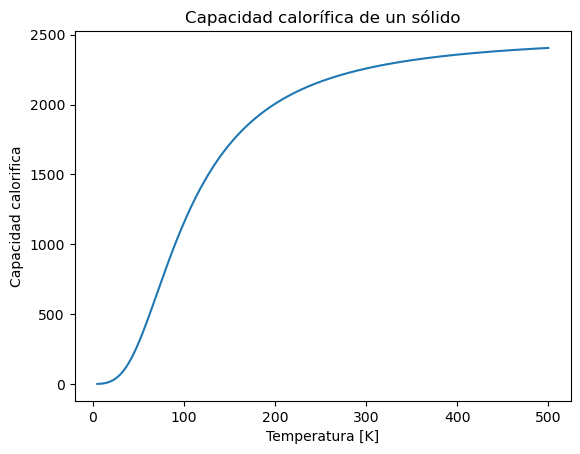

In [57]:
x=[i for i in range(5,501)]
y=[]
for x1 in x:
    y.append(Cv(x1))
plot(x,y)

title("Capacidad calorífica de un sólido")
xlabel("Temperatura [K]")
ylabel("Capacidad calorifica")

Text(0, 0.5, '$\\psi_n (X)$')

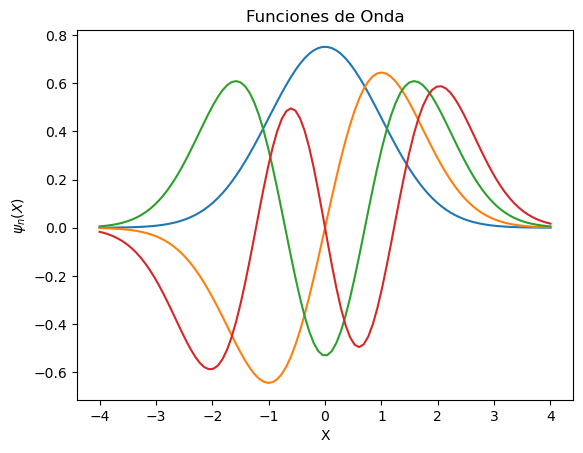

In [113]:
def H(n,x):
    if n==0:
        return 1
    elif n==1:
        return 2*x
    elif n >1:
        H0=1
        H1=2*x
        Hn=0
        for i in range(2,n+1):
            Hn= 2*x*H1 - 2*(i-1)*H0
            H1,H0= Hn,H1
        return Hn
    
def Psi(n,x):
    return 1/sqrt(2**n * factorial(n) * sqrt(pi)) * exp(- x ** 2 / 2) * H(n, x)

X = np.linspace(-4, 4, 100)
P0 = []
P1 = []
P2 = []
P3 = []
for x in X:
    P0.append(Psi(0, x))
    P1.append(Psi(1, x))
    P2.append(Psi(2, x))
    P3.append(Psi(3, x))
plt.plot(X,P0)
plt.plot(X,P1)
plt.plot(X,P2)
plt.plot(X,P3)
title("Funciones de Onda")
xlabel("X")
ylabel("$\psi_n (X)$")

Text(0, 0.5, '$\\psi_{30} (X)$')

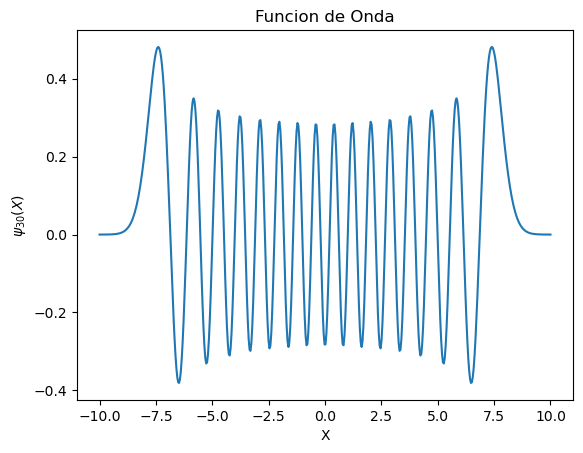

In [118]:
X = np.linspace(-10, 10, 500)
P30 = []
for x in X:
    P30.append(Psi(30, x))
plt.plot(X,P30)
title("Funcion de Onda")
xlabel("X")
ylabel("$\psi_{30} (X)$")

In [123]:
def rms_integrand(z):
    def x(z):
        return z / (1 - z)
    return x(z) ** 2 * abs(Psi(5, x(z))) ** 2 * (1 / (1 - z) ** 2)


integral = 0.0
N = 100
x, w = sp.roots_legendre(N)
for k in range(N):
    integral += w[k] * rms_integrand(x[k])
print(sqrt(2 * integral))

2.3480629887609314
